<a href="https://colab.research.google.com/github/eugenie-kim012/DeepLearningDS4/blob/main/D%2B54%2C_FASHION_MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0_DL_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 모델 실습 - Fashion MNIST 데이터셋

## 1. 데이터 로드

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

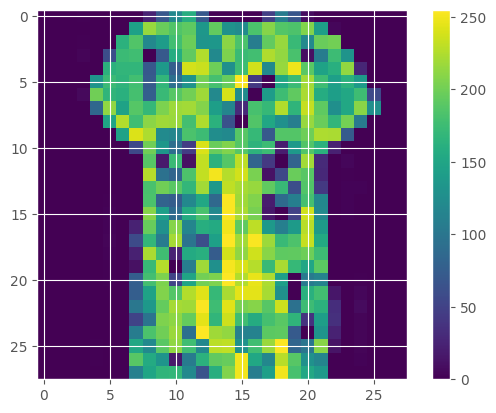

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

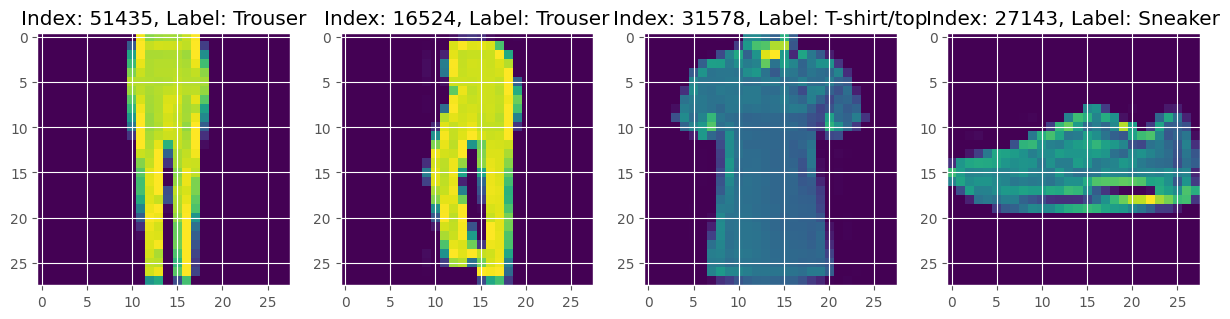

In [7]:
import numpy as np
import matplotlib.pyplot as plt  # 시각화를 위해 matplotlib 불러오기

num_sample = 4  # 랜덤하게 선택할 이미지 개수

# 전체 학습 데이터(총 60,000개) 중에서 랜덤으로 4개 인덱스를 뽑음
random_idxs = np.random.randint(60000, size=num_sample)  # 예: [35210, 501, 25896, 59182]

plt.figure(figsize=(15, 10))  # 전체 그림의 크기 설정

# 랜덤하게 뽑은 4개의 인덱스를 순회하면서 그림 그리기
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]            # 선택한 인덱스의 이미지 데이터를 가져옴
    label = y_train_full[idx]               # 해당 이미지의 정답 라벨 가져옴
    plt.subplot(1, len(random_idxs), i+1)   # 1행 4열 중 i+1번째 서브플롯 생성
    plt.imshow(image)                       # 이미지 출력
    plt.title(f'Index: {idx}, Label: {class_names[label]}')  # 이미지 위에 제목 표시

## 2. 데이터 전처리
* 기본적으로 데이터셋은 28 x 28 크기의 이미지가 학습 데이터 42,000개, 검증 데이터 18,000개, 테스트 데이터 10,000개로 구성

In [8]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [9]:
# (N, 28, 28) 형태의 이미지 데이터를 (N, 784) 형태의 1차원 벡터로 변환
x_train = x_train.reshape(-1, 28 * 28)  # 훈련 데이터: 샘플 개수는 자동 계산, 각 샘플은 784차원
x_val = x_val.reshape(-1, 28 * 28)      # 검증 데이터도 동일하게 1차원으로 변환
x_test = x_test.reshape(-1, 28 * 28)    # 테스트 데이터도 마찬가지로 변환

# 각 데이터셋의 최종 형태 출력 (예: (42000, 784), (18000, 784), (10000, 784))
print(x_train.shape)  # 훈련 데이터의 형태 확인
print(x_val.shape)    # 검증 데이터의 형태 확인
print(x_test.shape)   # 테스트 데이터의 형태 확인


(42000, 784)
(18000, 784)
(10000, 784)


In [10]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# 03. 모델 구성

In [11]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 04. 모델 컴파일 및 학습
* 모델에 사용할 옵티마이저는 SGD를 사용하고, 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로 sparse_categorical_crossentropy를 지정하며, 지표는 accuracy를 사용합니다.

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [13]:
# Fashion MNIST 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고,
#에폭(epochs)은 60으로 지정하며, 배치 사이즈는 512로 지정하고, 검증을 위해서는 검증 데이터로 분리시킨 x_val와 y_val를 지정하여 fit() 함수를 실행시킵니다.

history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.2157 - loss: 2.2674 - val_accuracy: 0.3592 - val_loss: 2.0447
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5114 - loss: 1.9800 - val_accuracy: 0.5415 - val_loss: 1.8232
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6188 - loss: 1.7687 - val_accuracy: 0.6373 - val_loss: 1.6433
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6525 - loss: 1.6029 - val_accuracy: 0.6707 - val_loss: 1.4939
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6788 - loss: 1.4637 - val_accuracy: 0.6808 - val_loss: 1.3823
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6891 - loss: 1.3535 - val_accuracy: 0.6770 - val_loss: 1.2865
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6984 - loss: 1.2605 - val_accuracy: 0.7006 - val_loss: 1.2064
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7015 - loss: 1.1881 - val_accuracy: 0.6992 - v

* 모델의 학습 과정을 저장한 history에 포함되어 있는 loss, val_loss, accuracy, val_accuracy를 차트로 시각화하는 show_history() 함수를 정의합니다.

In [14]:
def show_history(history):
    history_dict = history.history  # 모델 학습 결과가 저장된 history 객체에서 딕셔너리 추출

    loss = history_dict['loss']  # 훈련 손실값
    val_loss = history_dict['val_loss']  # 검증 손실값

    epochs = range(1, len(loss) + 1)  # 에포크 수만큼 x축 값 생성 (1부터 시작)
    fig = plt.figure(figsize=(12, 5))  # 전체 그래프 크기 설정

    # 🔹 손실(loss) 그래프 그리기
    ax1 = fig.add_subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프 (왼쪽)
    ax1.plot(epochs, loss, 'b-', label='train_loss')  # 훈련 손실: 파란 선
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')  # 검증 손실: 빨간 선
    ax1.set_title('Train and Validation Loss')  # 그래프 제목
    ax1.set_xlabel('Epochs')  # x축 이름
    ax1.set_ylabel('Loss')  # y축 이름
    ax1.grid()  # 격자 추가
    ax1.legend()  # 범례 표시

    # 🔹 정확도(accuracy) 그래프 그리기
    accuracy = history_dict['accuracy']  # 훈련 정확도
    val_accuracy = history_dict['val_accuracy']  # 검증 정확도

    ax2 = fig.add_subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프 (오른쪽)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')  # 훈련 정확도: 파란 선
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')  # 검증 정확도: 빨간 선
    ax2.set_title('Train and Validation Accuracy')  # 그래프 제목
    ax2.set_xlabel('Epochs')  # x축 이름
    ax2.set_ylabel('Accuracy')  # y축 이름
    ax2.grid()  # 격자 추가
    ax2.legend()  # 범례 표시

    plt.show()  # 최종적으로 그래프 출력

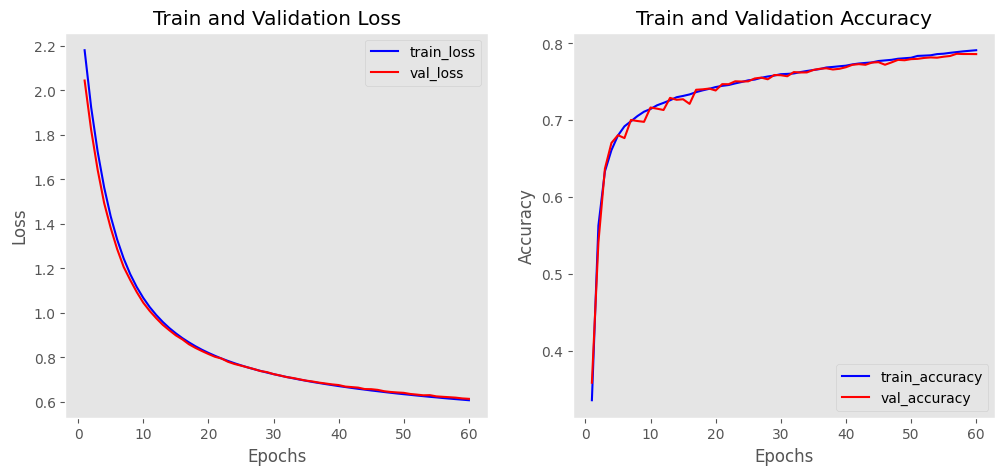

In [15]:
show_history(history)

## 0.5 모델 평가 및 예측
* 모델이 학습한 결과를 평가하기 위해서는 테스트 데이터셋인 x_test와 y_test를 지정하여 evaluate()를 실행시킵니다. 실행 결과로는 모델이 테스트 데이터셋에서는 어느 정도의 성능이 나오는지 loss와 accuracy 값을 살펴볼 수 있습니다.

In [16]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7826 - loss: 0.6214


[0.6274153590202332, 0.7789000272750854]

In [17]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.3300265e-02 9.4208598e-01 4.1321157e-03 1.2177066e-02 2.2928605e-02
 2.8745535e-05 5.2325455e-03 3.3491815e-05 6.4380773e-05 1.6816317e-05]
1
Trouser


In [18]:
def plot_image(i, pred_ys, y_test, img):
    # i번째 샘플의 예측값, 실제값, 이미지를 가져옴
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]

    plt.grid(False)        # 격자 제거
    plt.xticks([])         # x축 눈금 제거
    plt.yticks([])         # y축 눈금 제거
    plt.imshow(img, cmap=plt.cm.binary)  # 흑백(binary) 컬러맵으로 이미지 출력

    predicted_label = np.argmax(pred_ys)  # 예측 확률 중 가장 높은 값의 인덱스 (예측 클래스)

    # 예측이 정답과 일치하면 파란색, 틀리면 빨간색으로 텍스트 표시
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    # 이미지 아래에 예측 결과, 확률, 실제 정답 표시 (예: Sneaker 99% (Sneaker))
    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],       # 예측한 클래스 이름
            100 * np.max(pred_ys),              # 예측 확률 (0~1 → 0~100%)
            class_names[y_test]                 # 실제 정답 클래스 이름
        ),
        color=color  # 맞으면 파랑, 틀리면 빨강
    )


In [19]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

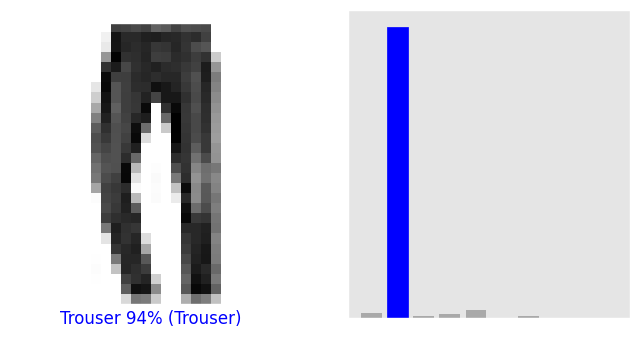

In [20]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

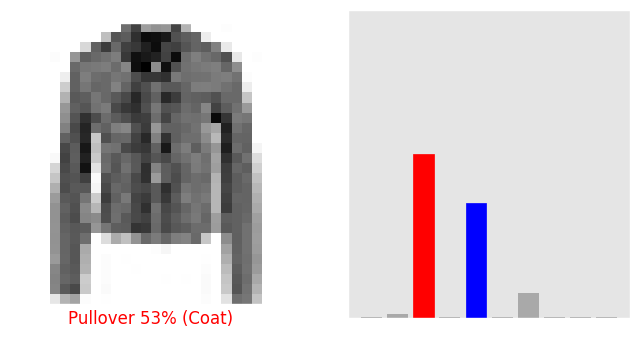

In [21]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

# 모델 예측 결과 여러 개를 눈으로 확인할 수 있도록 32(8x4)개를 출력하도록

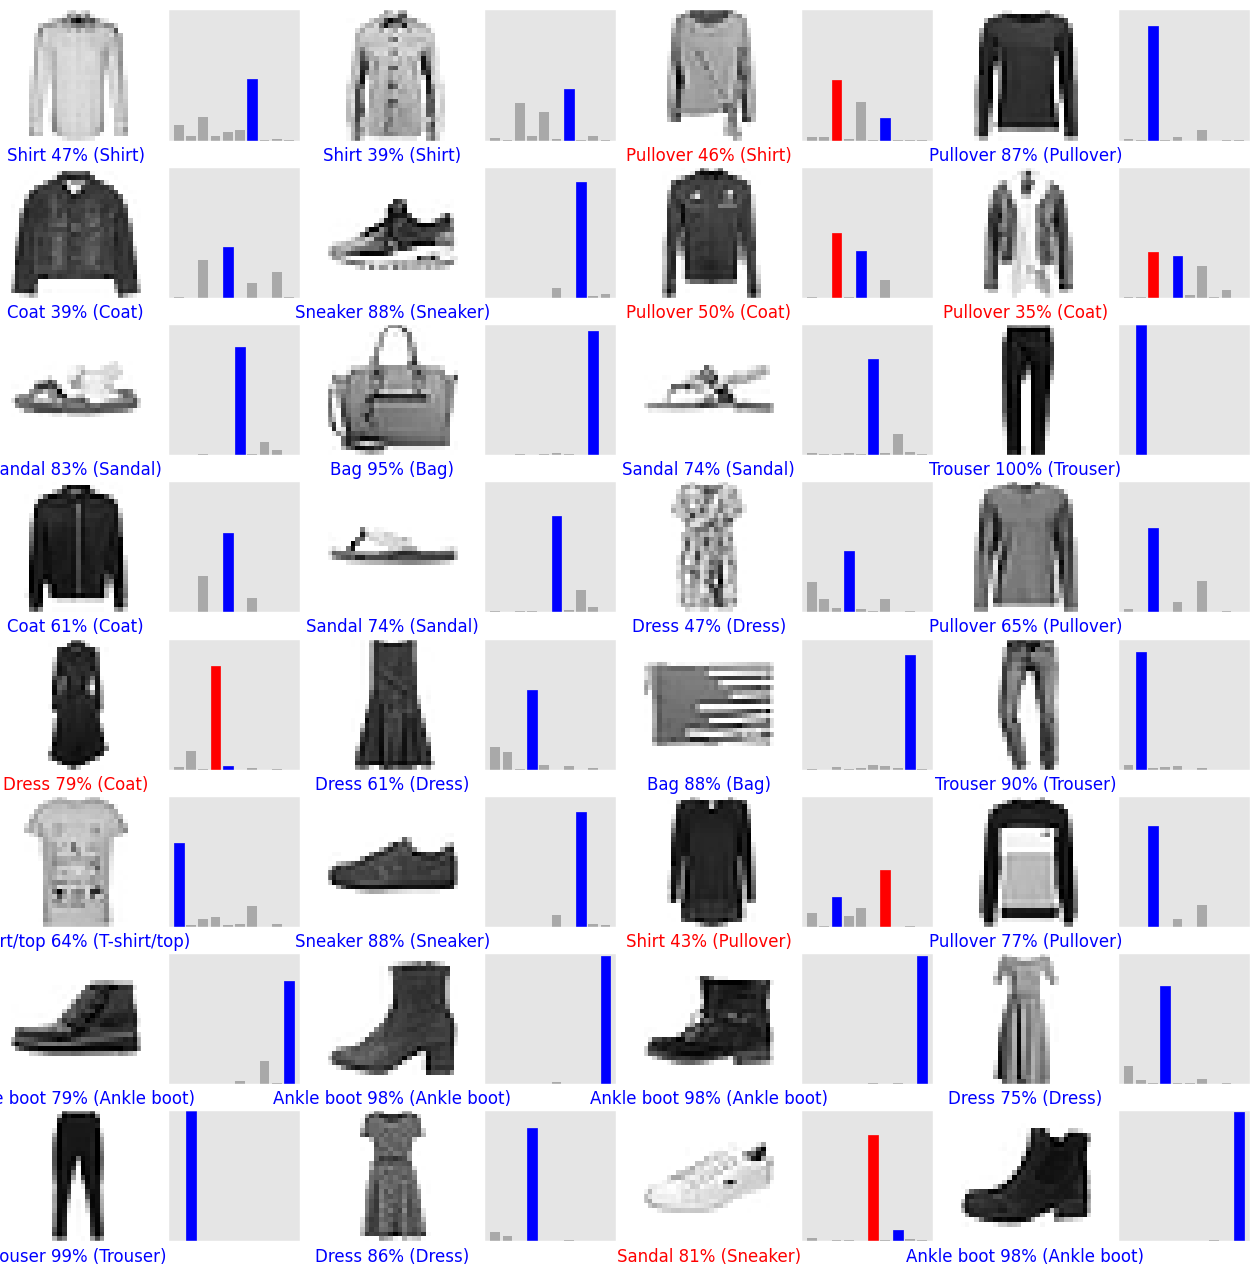

In [22]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [23]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.70      0.81      0.75      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.65      0.69      0.66      1000
       Dress       0.76      0.84      0.80      1000
        Coat       0.64      0.70      0.67      1000
      Sandal       0.83      0.84      0.84      1000
       Shirt       0.54      0.31      0.40      1000
     Sneaker       0.85      0.84      0.84      1000
         Bag       0.90      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



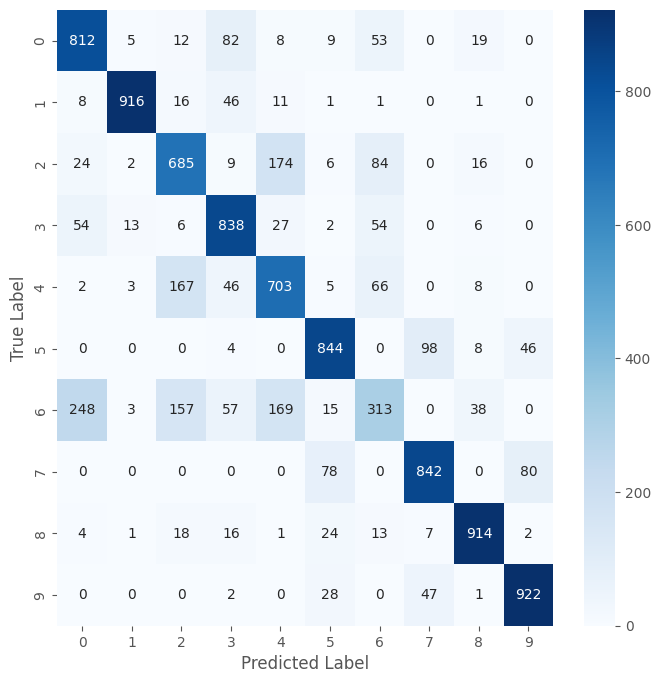

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 모델 최적화

In [25]:
# early stopping

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.5938

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7962 - loss: 0.5938 - val_accuracy: 0.7974 - val_loss: 0.5868
Epoch 2/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8038 - loss: 0.5673

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8038 - loss: 0.5672 - val_accuracy: 0.8042 - val_loss: 0.5653
Epoch 3/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8100 - loss: 0.5490

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8100 - loss: 0.5490 - val_accuracy: 0.8086 - val_loss: 0.5474
Epoch 4/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8144 - loss: 0.5320

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8144 - loss: 0.5320 - val_accuracy: 0.8136 - val_loss: 0.5321
Epoch 5/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8198 - loss: 0.5158

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8198 - loss: 0.5158 - val_accuracy: 0.8192 - val_loss: 0.5215
Epoch 6/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8201 - loss: 0.5101

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8201 - loss: 0.5101 - val_accuracy: 0.8205 - val_loss: 0.5149
Epoch 7/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8256 - loss: 0.4996

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8256 - loss: 0.4996 - val_accuracy: 0.8216 - val_loss: 0.5087
Epoch 8/60
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8275 - loss: 0.4910

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8275 - loss: 0.4909 - val_accuracy: 0.8318 - val_loss: 0.4962
Epoch 9/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8291 - loss: 0.4860

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8291 - loss: 0.4860 - val_accuracy: 0.8325 - val_loss: 0.4894
Epoch 10/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8357 - loss: 0.4680

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8356 - loss: 0.4681 - val_accuracy: 0.8319 - val_loss: 0.4841
Epoch 11/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8349 - loss: 0.4679

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8349 - loss: 0.4679 - val_accuracy: 0.8344 - val_loss: 0.4785
Epoch 12/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8371 - loss: 0.4639 - val_accuracy: 0.8303 - val_loss: 0.4843
Epoch 13/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8371 - loss: 0.4632 - val_accuracy: 0.8341 - val_loss: 0.4787
Epoch 14/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.4558

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8413 - loss: 0.4558 - val_accuracy: 0.8384 - val_loss: 0.4699
Epoch 15/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8395 - loss: 0.4510

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8395 - loss: 0.4510 - val_accuracy: 0.8402 - val_loss: 0.4661
Epoch 16/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8424 - loss: 0.4500

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8424 - loss: 0.4500 - val_accuracy: 0.8401 - val_loss: 0.4601
Epoch 17/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8460 - loss: 0.4348

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8460 - loss: 0.4348 - val_accuracy: 0.8421 - val_loss: 0.4588
Epoch 18/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8489 - loss: 0.4345 - val_accuracy: 0.8371 - val_loss: 0.4667
Epoch 19/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8440 - loss: 0.4380

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8440 - loss: 0.4380 - val_accuracy: 0.8439 - val_loss: 0.4528
Epoch 20/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8492 - loss: 0.4301 - val_accuracy: 0.8386 - val_loss: 0.4598
Epoch 21/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8475 - loss: 0.4283

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8475 - loss: 0.4284 - val_accuracy: 0.8442 - val_loss: 0.4493
Epoch 22/60
1301/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.4287

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8498 - loss: 0.4287 - val_accuracy: 0.8456 - val_loss: 0.4469
Epoch 23/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8510 - loss: 0.4319 - val_accuracy: 0.8452 - val_loss: 0.4478
Epoch 24/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8525 - loss: 0.4275

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8525 - loss: 0.4275 - val_accuracy: 0.8454 - val_loss: 0.4458
Epoch 25/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8495 - loss: 0.4270

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8495 - loss: 0.4270 - val_accuracy: 0.8484 - val_loss: 0.4415
Epoch 26/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8530 - loss: 0.4200

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8530 - loss: 0.4200 - val_accuracy: 0.8496 - val_loss: 0.4407
Epoch 27/60
1301/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8532 - loss: 0.4207

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8532 - loss: 0.4206 - val_accuracy: 0.8498 - val_loss: 0.4377
Epoch 28/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8502 - loss: 0.4220

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8502 - loss: 0.4220 - val_accuracy: 0.8500 - val_loss: 0.4361
Epoch 29/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8544 - loss: 0.4156 - val_accuracy: 0.8482 - val_loss: 0.4387
Epoch 30/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8516 - loss: 0.4160

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8516 - loss: 0.4160 - val_accuracy: 0.8508 - val_loss: 0.4330
Epoch 31/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8541 - loss: 0.4080

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8541 - loss: 0.4080 - val_accuracy: 0.8513 - val_loss: 0.4324
Epoch 32/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8545 - loss: 0.4127 - val_accuracy: 0.8496 - val_loss: 0.4339
Epoch 33/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8571 - loss: 0.4140

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8571 - loss: 0.4140 - val_accuracy: 0.8525 - val_loss: 0.4283
Epoch 34/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8559 - loss: 0.4051 - val_accuracy: 0.8502 - val_loss: 0.4314
Epoch 35/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8597 - loss: 0.3951

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8597 - loss: 0.3951 - val_accuracy: 0.8518 - val_loss: 0.4270
Epoch 36/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8607 - loss: 0.4011

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8607 - loss: 0.4011 - val_accuracy: 0.8507 - val_loss: 0.4260
Epoch 37/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8585 - loss: 0.3992

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8585 - loss: 0.3992 - val_accuracy: 0.8527 - val_loss: 0.4257
Epoch 38/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.4021

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8582 - loss: 0.4021 - val_accuracy: 0.8542 - val_loss: 0.4236
Epoch 39/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8626 - loss: 0.3912 - val_accuracy: 0.8526 - val_loss: 0.4269
Epoch 40/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8618 - loss: 0.3903 - val_accuracy: 0.8538 - val_loss: 0.4236
Epoch 41/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8614 - loss: 0.3925

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8614 - loss: 0.3925 - val_accuracy: 0.8548 - val_loss: 0.4215
Epoch 42/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8624 - loss: 0.3861

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8624 - loss: 0.3862 - val_accuracy: 0.8545 - val_loss: 0.4202
Epoch 43/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8635 - loss: 0.3863 - val_accuracy: 0.8528 - val_loss: 0.4214
Epoch 44/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8599 - loss: 0.3918

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8599 - loss: 0.3918 - val_accuracy: 0.8568 - val_loss: 0.4186
Epoch 45/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8622 - loss: 0.3883

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8622 - loss: 0.3884 - val_accuracy: 0.8571 - val_loss: 0.4163
Epoch 46/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8592 - loss: 0.3968 - val_accuracy: 0.8549 - val_loss: 0.4199
Epoch 47/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8642 - loss: 0.3835 - val_accuracy: 0.8553 - val_loss: 0.4166
Epoch 48/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 0.3830

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8641 - loss: 0.3830 - val_accuracy: 0.8567 - val_loss: 0.4154
Epoch 49/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8639 - loss: 0.3855 - val_accuracy: 0.8551 - val_loss: 0.4163
Epoch 50/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8662 - loss: 0.3769

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8661 - loss: 0.3770 - val_accuracy: 0.8580 - val_loss: 0.4116
Epoch 51/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8636 - loss: 0.3896

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8636 - loss: 0.3896 - val_accuracy: 0.8581 - val_loss: 0.4114
Epoch 52/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.3781

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8667 - loss: 0.3781 - val_accuracy: 0.8592 - val_loss: 0.4105
Epoch 53/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8625 - loss: 0.3868 - val_accuracy: 0.8574 - val_loss: 0.4116
Epoch 54/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8645 - loss: 0.3775

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8645 - loss: 0.3775 - val_accuracy: 0.8579 - val_loss: 0.4095
Epoch 55/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8652 - loss: 0.3780

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8652 - loss: 0.3780 - val_accuracy: 0.8596 - val_loss: 0.4081
Epoch 56/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8661 - loss: 0.3787

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8661 - loss: 0.3787 - val_accuracy: 0.8589 - val_loss: 0.4060
Epoch 57/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8660 - loss: 0.3766 - val_accuracy: 0.8593 - val_loss: 0.4064
Epoch 58/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8675 - loss: 0.3768 - val_accuracy: 0.8590 - val_loss: 0.4074
Epoch 59/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8671 - loss: 0.3762 - val_accuracy: 0.8582 - val_loss: 0.4079
Epoch 60/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8650 - loss: 0.3795 - val_accuracy: 0.8588 - val_loss: 0.4062


* threshold는 EarlyStopping이 반응할 정도로 성능 향상이 충분히 크냐를 판단하는 기준값.

early stopping 핵심 매개 변수 요약

| 매개변수                           | 설명                                                 |
| ------------------------------ | -------------------------------------------------- |
| `monitor`                      | 어떤 지표를 기준으로 할지 (예: `'val_loss'`, `'val_accuracy'`) |
| `patience`                     | 성능 향상이 없더라도 몇 번(에포크)까지 기다릴지                        |
| `min_delta` *(= threshold 역할)* | 성능 향상이 이 숫자보다 커야 "개선됐다"고 간주함                       |
| `restore_best_weights`         | 조기 종료 시점에서 가장 좋았던 모델 가중치로 되돌릴지                     |


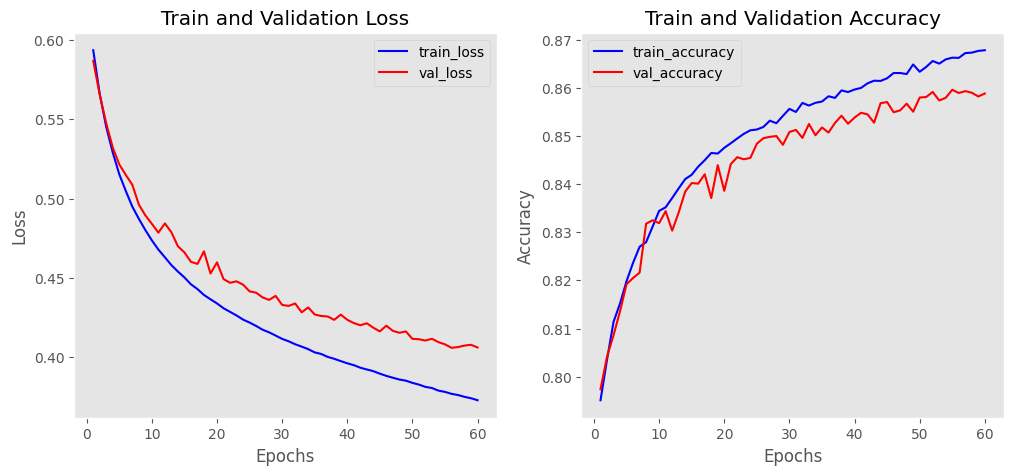

In [26]:
show_history(history)

In [27]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8528 - loss: 0.4220


[0.42649760842323303, 0.8460000157356262]

# 활성화 함수

In [28]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7757 - loss: 0.6383

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7760 - loss: 0.6375 - val_accuracy: 0.8574 - val_loss: 0.3958
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8603 - loss: 0.3834

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8603 - loss: 0.3834 - val_accuracy: 0.8628 - val_loss: 0.3840
Epoch 3/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8705 - loss: 0.3457

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8705 - loss: 0.3456 - val_accuracy: 0.8711 - val_loss: 0.3553
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8849 - loss: 0.3130 - val_accuracy: 0.8706 - val_loss: 0.3563
Epoch 5/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8933 - loss: 0.2894

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8933 - loss: 0.2894 - val_accuracy: 0.8760 - val_loss: 0.3477
Epoch 6/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8975 - loss: 0.2704

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8975 - loss: 0.2704 - val_accuracy: 0.8790 - val_loss: 0.3400
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9034 - loss: 0.2579 - val_accuracy: 0.8802 - val_loss: 0.3415
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9087 - loss: 0.2443

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9087 - loss: 0.2443 - val_accuracy: 0.8858 - val_loss: 0.3355
Epoch 9/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9116 - loss: 0.2348

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9116 - loss: 0.2348 - val_accuracy: 0.8897 - val_loss: 0.3228
Epoch 10/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9146 - loss: 0.2213 - val_accuracy: 0.8813 - val_loss: 0.3436
Epoch 11/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9194 - loss: 0.2134 - val_accuracy: 0.8766 - val_loss: 0.3614
Epoch 12/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9213 - loss: 0.2080 - val_accuracy: 0.8858 - val_loss: 0.3520
Epoch 13/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9238 - loss: 0.1972 - val_accuracy: 0.8865 - val_loss: 0.3570
Epoch 14/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9269 - loss: 0.1912 - val_accuracy: 0.8906 - val_loss: 0.3404
Epoch 15/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9306 - loss: 0.1791 - val_accuracy: 0.8948 - val_loss: 0.3264
Epoch 16/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9344 - loss:

In [30]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss2')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss2')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy2')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy2')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

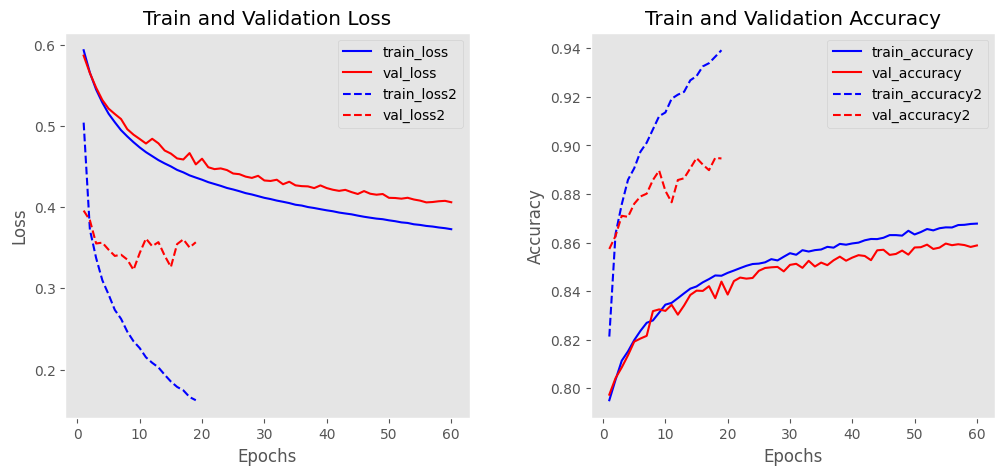

In [31]:
diff_history(history, history2)

In [32]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8824 - loss: 0.3480


[0.34788718819618225, 0.8812000155448914]

## 옵티마이저

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [34]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9109 - loss: 0.2344

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9109 - loss: 0.2344 - val_accuracy: 0.8906 - val_loss: 0.3212
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9164 - loss: 0.2136 - val_accuracy: 0.8874 - val_loss: 0.3426
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9202 - loss: 0.2093 - val_accuracy: 0.8916 - val_loss: 0.3340
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9249 - loss: 0.1980 - val_accuracy: 0.8834 - val_loss: 0.3555
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9291 - loss: 0.1873 - val_accuracy: 0.8933 - val_loss: 0.3347
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9309 - loss: 0.1825 - val_accuracy: 0.8846 - val_loss: 0.3875
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9303 - loss: 0.1826 - val_accuracy: 0.8914 - val_loss: 0.3613
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9340 - loss: 0.1711

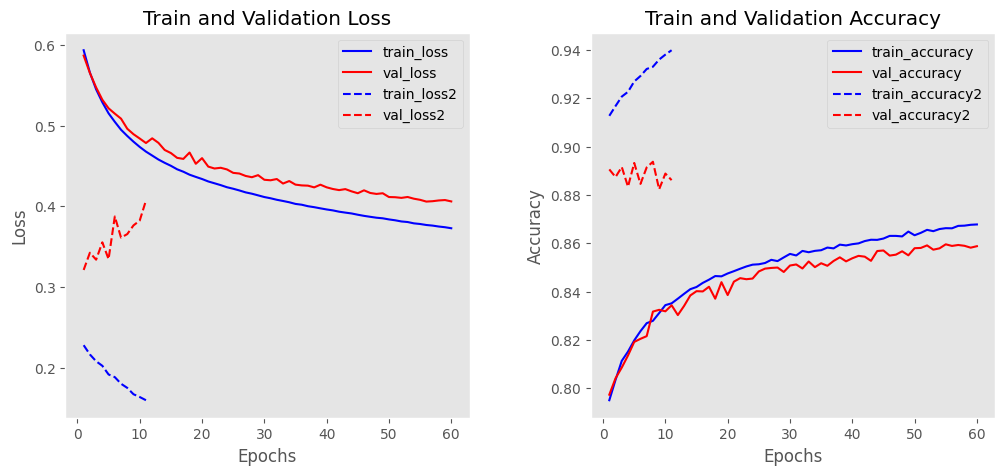

In [35]:
diff_history(history, history3)

In [36]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8842 - loss: 0.3387


[0.3424314558506012, 0.8841999769210815]

# 규제

In [37]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))

# 여기서 L2 규제를 추가함 (lambda=0.001은 흔히 쓰이는 값)
model.add(layers.Dense(512,
                       activation='sigmoid',
                       kernel_regularizer=regularizers.l2(0.001)))  # 🔹 L2 규제 추가

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [40]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7443 - loss: 1.0471 - val_accuracy: 0.8026 - val_loss: 0.6618
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8057 - loss: 0.6553 - val_accuracy: 0.8084 - val_loss: 0.6492
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8174 - loss: 0.6274 - val_accuracy: 0.8124 - val_loss: 0.6277
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8184 - loss: 0.6054 - val_accuracy: 0.7686 - val_loss: 0.7135
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8208 - loss: 0.5979 - val_accuracy: 0.8107 - val_loss: 0.6398
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8218 - loss: 0.5951 - val_accuracy: 0.8314 - val_loss: 0.5681
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8254 - loss: 0.5802 - val_accuracy: 0.8153 - val_loss: 0.6004
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8332 -

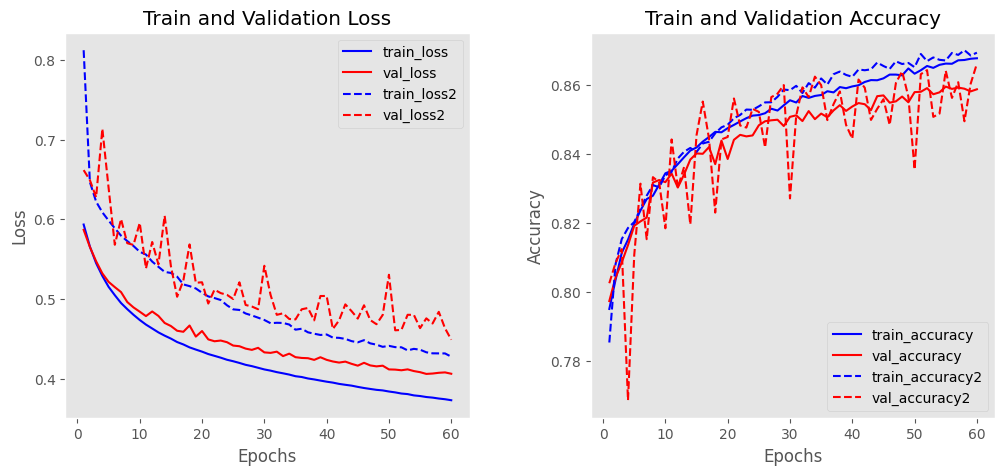

In [41]:
diff_history(history, history4)

In [42]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8630 - loss: 0.4634


[0.4690466821193695, 0.8586000204086304]

# 드롭 아웃

In [43]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))

# 첫 번째 Dense 층 + L2 규제
model.add(layers.Dense(512,
                       activation='sigmoid',
                       kernel_regularizer=regularizers.l2(0.001)))

# 🔹 Dropout 층 추가 (50% 확률로 노드 비활성화)
model.add(layers.Dropout(0.5))

# 출력층
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [46]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7034 - loss: 1.1864 - val_accuracy: 0.7768 - val_loss: 0.7469
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7741 - loss: 0.7706 - val_accuracy: 0.8029 - val_loss: 0.6912
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7801 - loss: 0.7502 - val_accuracy: 0.8042 - val_loss: 0.6837
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7767 - loss: 0.7467 - val_accuracy: 0.8128 - val_loss: 0.6656
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7821 - loss: 0.7513 - val_accuracy: 0.8055 - val_loss: 0.6777
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7831 - loss: 0.7346 - val_accuracy: 0.8101 - val_loss: 0.6702
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7890 - loss: 0.7289 - val_accuracy: 0.8014 - val_loss: 0.6789
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7853 -

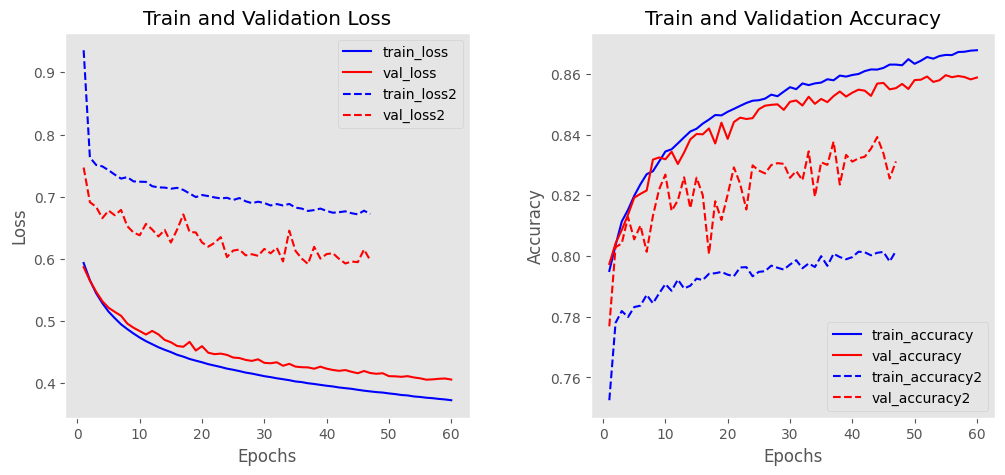

In [47]:
diff_history(history, history5)

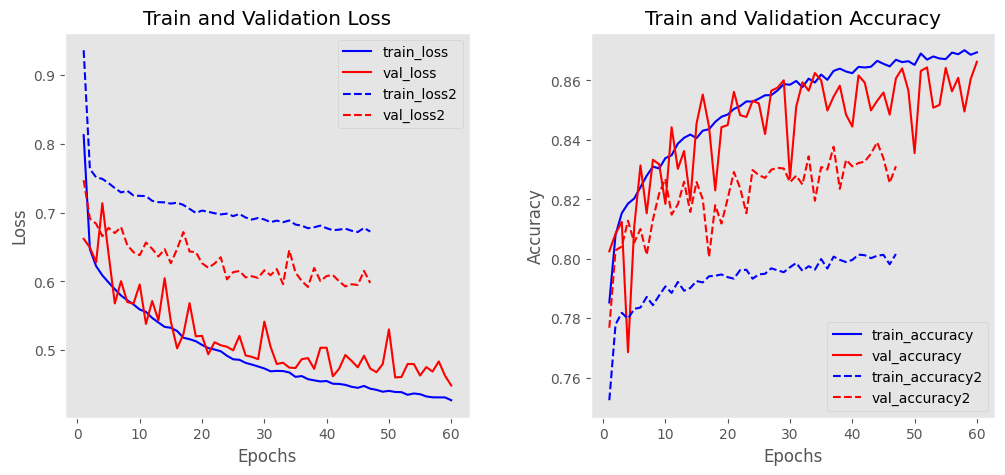

In [48]:
diff_history(history4, history5)

In [49]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8319 - loss: 0.6051


[0.611958920955658, 0.8270000219345093]

# 배치정규화

In [50]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력: 784차원 (28x28)

# 🔸 Dense → BatchNormalization → (기존 활성화는 유지)
model.add(layers.Dense(512, activation='relu'))  # 활성화 함수는 그대로 사용
model.add(layers.BatchNormalization())           # 🔹배치 정규화만 추가

model.add(layers.Dense(10, activation='softmax'))  # 출력층

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [52]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [53]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7966 - loss: 0.5805 - val_accuracy: 0.8426 - val_loss: 0.4527
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8478 - loss: 0.4218 - val_accuracy: 0.8364 - val_loss: 0.4545
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8587 - loss: 0.3923 - val_accuracy: 0.8482 - val_loss: 0.4457
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8674 - loss: 0.3673 - val_accuracy: 0.8577 - val_loss: 0.4213
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8744 - loss: 0.3413 - val_accuracy: 0.8668 - val_loss: 0.3838
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8754 - loss: 0.3313 - val_accuracy: 0.8629 - val_loss: 0.3974
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8845 - loss: 0.3158 - val_accuracy: 0.8675 - val_loss: 0.3756
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8848 - loss

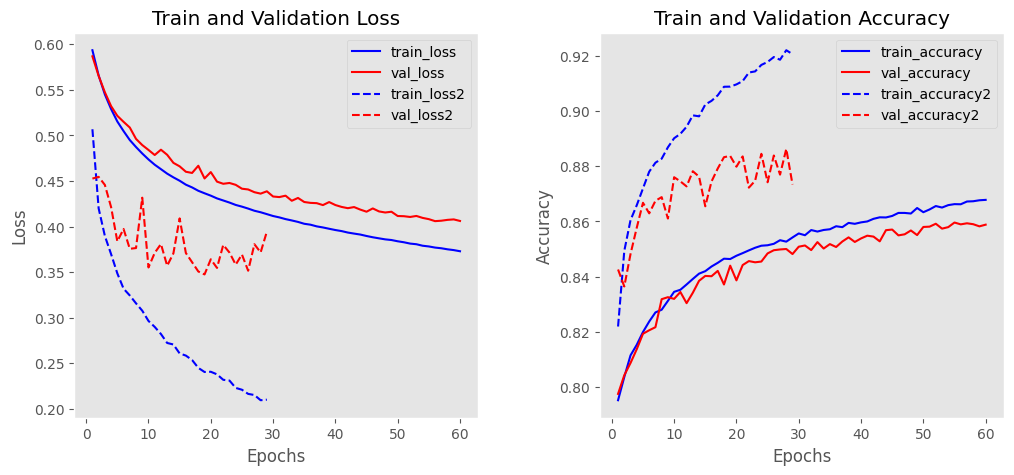

In [54]:
diff_history(history, history6)

In [55]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8751 - loss: 0.3689


[0.37667331099510193, 0.8708999752998352]

In [56]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력: 784차원 벡터

# 🔹 Dense → BatchNorm → Activation → Dropout
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001)))  # L2 규제도 같이 적용 (선택)
model.add(layers.BatchNormalization())  # 배치 정규화
model.add(layers.Activation('relu'))    # 비선형성 추가
model.add(layers.Dropout(0.5))          # 50% 드롭아웃으로 과적합 억제

# 🔸 출력층: 다중 클래스 분류
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [58]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [59]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7588 - loss: 1.1551 - val_accuracy: 0.8389 - val_loss: 0.6516
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8179 - loss: 0.6846 - val_accuracy: 0.8195 - val_loss: 0.6280
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8190 - loss: 0.6521 - val_accuracy: 0.8323 - val_loss: 0.6091
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8215 - loss: 0.6440 - val_accuracy: 0.8089 - val_loss: 0.6726
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8197 - loss: 0.6456 - val_accuracy: 0.8282 - val_loss: 0.6235
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8225 - loss: 0.6347 - val_accuracy: 0.8099 - val_loss: 0.6788
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8218 - loss: 0.6391 - val_accuracy: 0.8398 - val_loss: 0.6138
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8206 -

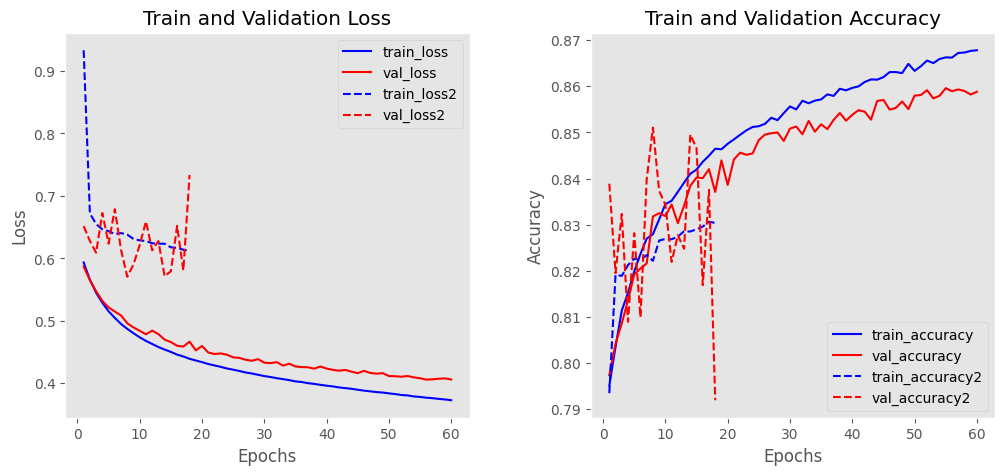

In [60]:
diff_history(history, history7)

In [61]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8454 - loss: 0.5890


[0.5884353518486023, 0.8418999910354614]

# 모델 결과 분석

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-62-3927089602>:28: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-62-3927089602>:28: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-62-3927089602>:28: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-62-3927089602>:28: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-62-3927089602>:28: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-62-3927089602>:28: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  

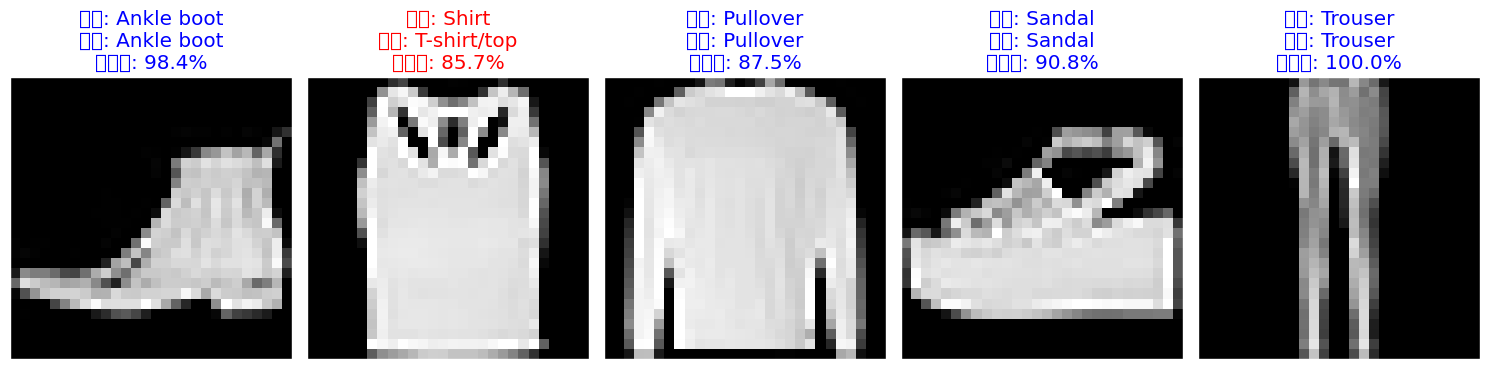

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 테스트셋에 대한 예측 수행
pred_probs = model.predict(x_test)  # 예측 확률 (10개의 클래스 확률)
pred_labels = np.argmax(pred_probs, axis=1)  # 예측 라벨 (가장 확률 높은 클래스)

# 🔹 무작위로 5개 샘플 선택
num_samples = 5
random_idxs = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_idxs):
    img = x_test[idx].reshape(28, 28)  # 이미지 형태 복원
    true_label = y_test[idx]
    predicted_label = pred_labels[idx]
    confidence = 100 * np.max(pred_probs[idx])  # 최고 확률 (%)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

    color = 'blue' if predicted_label == true_label else 'red'
    plt.title(f"예측: {class_names[predicted_label]}\n정답: {class_names[true_label]}\n정확도: {confidence:.1f}%", color=color)

plt.tight_layout()
plt.show()


In [63]:
# 최적화한 모델의 분류 결과를 클래스별로 성능 지표를 살펴봅니다.

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 결과
y_pred = np.argmax(model.predict(x_test), axis=1)

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 클래스별 성능 지표 출력
print("📊 [클래스별 성능 보고서]")
print(classification_report(y_test, y_pred, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📊 [클래스별 성능 보고서]
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.72      0.74      1000
       Dress       0.88      0.83      0.86      1000
        Coat       0.75      0.73      0.74      1000
      Sandal       0.91      0.92      0.92      1000
       Shirt       0.57      0.65      0.61      1000
     Sneaker       0.89      0.94      0.91      1000
         Bag       0.93      0.94      0.94      1000
  Ankle boot       0.96      0.90      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



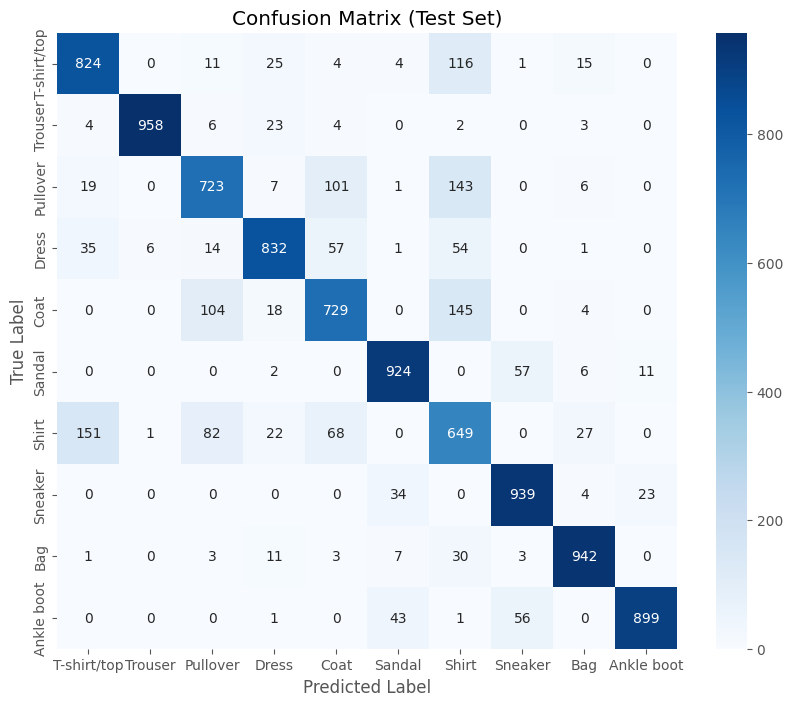

In [64]:
# 모델의 결과를 혼동 행렬를 통해서 시각화합니다.

plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()
